<a href="https://colab.research.google.com/github/sathamhussain7/task-6/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.shape

(15, 2)

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


**Cleaning the data**

In [ ]:
df.isnull().sum() #check for null values

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df.isna().any() #check for nan values

Chirps/Second         False
Ground Temperature    False
dtype: bool

In [ ]:
df=df.drop_duplicates() # drop duplicates in the data
df.shape

(15, 2)

In [ ]:
df.dtypes #check data types in the data

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


**Outlier detection**

In [ ]:
iqr = df['Chirps/Second'].quantile(0.75) - df['Chirps/Second'].quantile(0.25)
upper_threshold = df['Chirps/Second'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Chirps/Second'].quantile(0.25) - (1.5 * iqr)


print('iqr :',iqr)
print('upper_threshold : ',upper_threshold)
print('lower_threshold :',lower_threshold)
if upper_threshold > df['Chirps/Second'].max():
  print('No outlier in upper_threshold ')
else:
  print('outlier in upper_threshold')
if lower_threshold< df['Chirps/Second'].min():
   print('No outlier in lower_threshold ')
else:
  print('outlier in lower_threshold')

iqr : 1.6999999999999993
upper_threshold :  19.699999999999996
lower_threshold : 12.9
outlier in upper_threshold
No outlier in lower_threshold 


No outlier in the data

**Using plot to check linear relationship between feature and target variable**

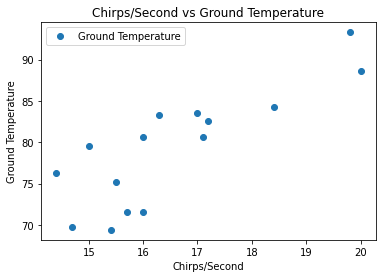

In [ ]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

Plot shows there is a linear relationship between feature and target variable

**check strength of the correlation**

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


1.There is strong linear relationship (0.8) between feature and target variable
2.transformation not required

**Splitting the data**

In [ ]:
X = df.loc[:,['Chirps/Second']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:,'Ground Temperature'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 7)

In [ ]:
y_test

array([69.4, 75.2, 79.6, 93.3])

In [ ]:
X_train.shape,X_test.shape

((11, 1), (4, 1))

# **Model training**

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

# **Linear regression equation**

In [ ]:
print(regressor.intercept_) # c

27.91075177304962


In [ ]:
print(regressor.coef_) # slope - m

[3.09453901]


# Ground Temperature=(3.09453901*Chirps/Second)+ (27.91075177304962)

<function matplotlib.pyplot.show(*args, **kw)>

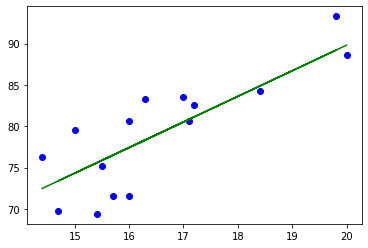

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,regressor.predict(X),color='green')
plt.show

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([75.56665248, 75.87610638, 74.32883688, 89.18262411])

**R2 score**

In [ ]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', regressor.score(X_test,y_test))


R2- SCORE: 0.7323061637642214


**Extrapolate data**

If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
approx_rate=(95-regressor.intercept_)/regressor.coef_
approx_rate

array([21.67988449])

**Interpolate data**

With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
regressor.predict([[18]])

array([83.6124539])

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.shape

(62, 2)

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


**Cleaning the data**

In [ ]:
df.isnull().sum() # check for null values

Brain    0
Body     0
dtype: int64

In [ ]:
df=df.drop_duplicates() # drop duplicates
df.shape

(62, 2)

In [ ]:
df.dtypes # check data types

Brain    float64
Body     float64
dtype: object

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


**Outlier detection**

In [ ]:
iqr=df.Body.quantile(0.75)-df.Body.quantile(0.25)
upper_threshold=df.Body.quantile(0.75)+(1.5*iqr)
lower_threshold=df.Body.quantile(0.75)-(1.5*iqr)
print('iqr :',iqr)
print('upper_threshold : ',upper_threshold)
print('lower_threshold :',lower_threshold)

iqr : 161.75
upper_threshold :  408.625
lower_threshold : -76.625


In [ ]:
df.Body = df.Body.clip(-76.625,408.625) #.clip(lt,ut)

In [ ]:
iqr=df.Brain.quantile(0.75)-df.Brain.quantile(0.25)
upper_threshold=df.Brain.quantile(0.75)+(1.5*iqr)
lower_threshold=df.Brain.quantile(0.75)-(1.5*iqr)
print('iqr :',iqr)
print('upper_threshold : ',upper_threshold)
print('lower_threshold :',lower_threshold)

iqr : 47.6025
upper_threshold :  119.60625
lower_threshold : -23.20125


In [ ]:
df.Brain = df.Brain.clip(-23.20,119.606) #.clip(lt,ut)

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176435,104.676532
std,45.213760,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606000,408.625000


**EDA(Exploratory data analysis)**

plotting (to check linear relationship between feature and target variable)

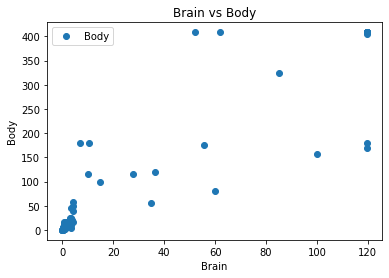

In [ ]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

plot shows there is linear relationship between feature and target variable

To check strength of linear relationship

In [ ]:
df.corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


strong correlation between feature and target variable 

**Splitting the data**

In [ ]:
X = df[['Brain']].values # select all rows and select all columns except the last column as my feature
y = df['Body'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_test

array([2.60000e+00, 8.10000e+00, 1.21000e+01, 2.40000e+00, 4.08625e+02,
       1.23000e+01, 2.10000e+01, 4.08625e+02, 1.40000e-01, 4.00000e+00,
       1.00000e+00, 4.00000e-01, 1.57000e+02])

In [ ]:
X_train.shape,X_test.shape

((49, 1), (13, 1))

# **Model training**

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # predicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

22.182425170856348


In [ ]:
print(regressor.coef_) # slope - m

[2.87863706]


**Linear regression equation**

# body=(2.87863706*brain)+22.182425170856348

<function matplotlib.pyplot.show(*args, **kw)>

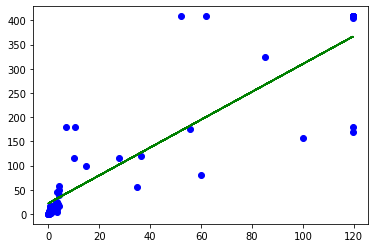

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,regressor.predict(X),color='green')
plt.show

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([ 24.77319852,  26.0685852 ,  29.37901781,  23.76567555,
       366.48468907,  27.93969929,  32.54551858, 200.65792274,
        22.19681836,  22.47316751,  22.35514339,  22.24863382,
       310.04613092])

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,2.600,24.773199
1,8.100,26.068585
2,12.100,29.379018
3,2.400,23.765676
4,408.625,366.484689
5,12.300,27.939699
6,21.000,32.545519
7,408.625,200.657923
8,0.140,22.196818
9,4.000,22.473168


# **R2 score**

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print('R2-SCORE:',regressor.score(X_test,y_test))

R2- SCORE: 0.7390360805286802
R2-SCORE: 0.7390360805286802


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.shape

(52, 6)

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


**Cleaning the data**

In [ ]:
df.isnull().sum() #check null values

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df=df.drop_duplicates() # drop duplicates
df.shape

(52, 6)

In [ ]:
df.dtypes # check data type

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


**outlier detection**

In [ ]:
iqr = df.YSdeg.quantile(0.75) - df.YSdeg.quantile(0.25)
upper_threshold = df.YSdeg.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.YSdeg.quantile(0.25) - (1.5 * iqr)

print(upper_threshold,lower_threshold)

48.0 -18.0


features within the range

## **EDA**

# **plotting**

In [ ]:
df.groupby('Sex')['Salary'].mean()

Sex
0    24696.789474
1    21357.142857
Name: Salary, dtype: float64

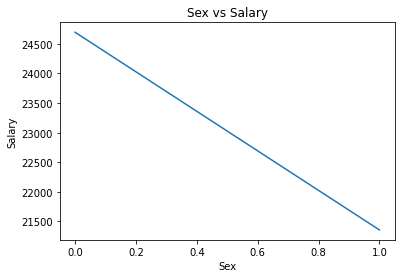

In [ ]:
df.groupby('Sex')['Salary'].mean().plot()
import matplotlib.pyplot as plt
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

plot shows linear relationship between sex vs salary

In [ ]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


There is a low linear relationshp between the data

<function matplotlib.pyplot.show(*args, **kw)>

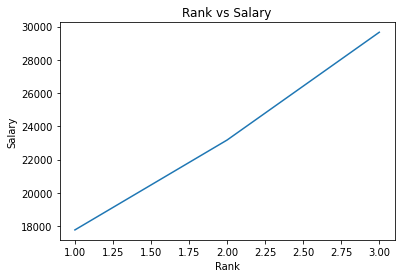

In [ ]:
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show

plot shows linear relationship between rank vs salary

In [ ]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


there is strong linear relationship between rank and salary

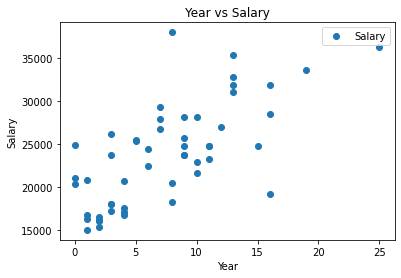

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
df[['Year','Salary']].corr()

plot shows linear relationship between year vs salary.
there is strong linear relationship between year and salary


<function matplotlib.pyplot.show(*args, **kw)>

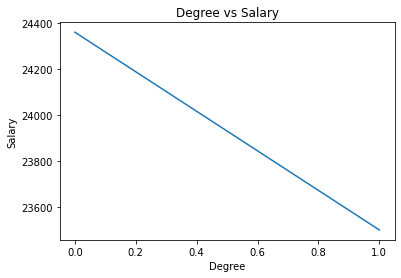

In [ ]:
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show

plot shows linear relationship between degree vs salary

In [ ]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


There is no linear relationship between degree vs salary. transformation required

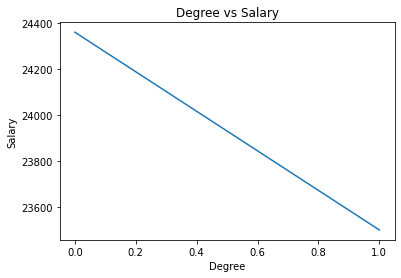

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df['transformed'] = np.square(df['Degree']) # transformation
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['transformed','Salary']].corr()

Have tried all trasnformations - still not able to see a good linear relationship 

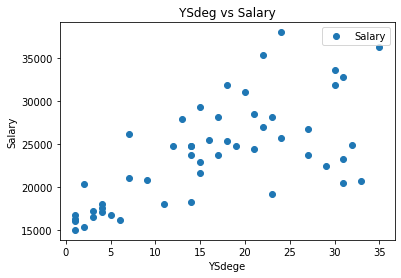

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdege')
plt.ylabel('Salary')
plt.show()
df[['YSdeg','Salary']].corr()

plot shows linear relationship between ysdeg vs salary. there is strong linear relationship between ysdeg and salary

In [ ]:
X = df[['Year','Rank','Sex','YSdeg','Degree']].values #array of features
y = df['Salary'].values #array of targets

# **splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **scalling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

# **model training**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Year','Rank','Sex','YSdeg','Degree'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Year,2426.269626
Rank,4663.425905
Sex,477.505951
YSdeg,-496.033054
Degree,125.360914


In [ ]:
regressor.intercept_ # c 

23655.90243902439

# 1.Find the linear regression equation for this data using columns 1-5 to column 6.

# salary=  23655.90243902439+ (477.505951 * sex)+ (2426.269626 * year)+ (4663.425905 * rank)+ (496.033054 * ysdeg)+ (125.360914 * degree)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,26182,21438.071793
1,17095,16907.551585
2,24750,26420.307923
3,22450,22765.454548
4,28200,29412.358800
5,21600,19807.126936
6,18075,16467.430709
7,23713,18364.913236
8,24800,24896.746490
9,33696,32772.357197


# **R2 score**

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6623158614875568


In [ ]:
regressor.score(X_test_scaled,y_test)

0.6623158614875568

In [ ]:
regressor.predict(scaler.transform(np.array([[1,1,3,35,45]])))

array([29120.24169813])

#  Find the selection of columns with the best  R2  score.

In [ ]:
combi=df.columns[:-1]
print(combi)

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], dtype='object')


In [ ]:
import itertools

In [ ]:
res=[]

for i in range(1,1+len(combi)):
  for combo in itertools.combinations(combi,i):
    res.append (list(combo))
    #print (i,combo)
print(res) 

[['Sex'], ['Rank'], ['Year'], ['Degree'], ['YSdeg'], ['Sex', 'Rank'], ['Sex', 'Year'], ['Sex', 'Degree'], ['Sex', 'YSdeg'], ['Rank', 'Year'], ['Rank', 'Degree'], ['Rank', 'YSdeg'], ['Year', 'Degree'], ['Year', 'YSdeg'], ['Degree', 'YSdeg'], ['Sex', 'Rank', 'Year'], ['Sex', 'Rank', 'Degree'], ['Sex', 'Rank', 'YSdeg'], ['Sex', 'Year', 'Degree'], ['Sex', 'Year', 'YSdeg'], ['Sex', 'Degree', 'YSdeg'], ['Rank', 'Year', 'Degree'], ['Rank', 'Year', 'YSdeg'], ['Rank', 'Degree', 'YSdeg'], ['Year', 'Degree', 'YSdeg'], ['Sex', 'Rank', 'Year', 'Degree'], ['Sex', 'Rank', 'Year', 'YSdeg'], ['Sex', 'Rank', 'Degree', 'YSdeg'], ['Sex', 'Year', 'Degree', 'YSdeg'], ['Rank', 'Year', 'Degree', 'YSdeg'], ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]


In [ ]:
print(len(res))

31


In [ ]:
r2=[]
for i in res:
  
 x1=df[i].values
 y=df['Salary'].values

 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=0)

 from sklearn.preprocessing import StandardScaler ## standrard scalig 
 scaler = StandardScaler() #initialise to a variable
 scaler.fit(X_train) # we are finding the values of mean and sd from the td
 X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
 X_test_scaled = scaler.transform(X_test) # transform the test data 

 from sklearn.linear_model import LinearRegression
 regressor = LinearRegression()
 regressor.fit(X_train_scaled, y_train)

 y_pred = regressor.predict(X_test_scaled)
 from sklearn import metrics
 r2.append(metrics.r2_score(y_test,y_pred))
print(r2)

[0.05273078428996336, 0.49233950351985356, 0.4741181617543718, -0.0005782266184284346, 0.4778605597109499, 0.5067545104421681, 0.45062200249270634, 0.019029873866475366, 0.6226469214344211, 0.7049309720719308, 0.4472173431873654, 0.5318112660825877, 0.41446925413150393, 0.5800978388278245, -0.1619662371411592, 0.6854999981878154, 0.4452175377717873, 0.5516787985327548, 0.40747732612419785, 0.5785513212955473, -0.17802791055542744, 0.6114912588446202, 0.7012109096135274, 0.31731762217428205, 0.1266299026052261, 0.6147805256151053, 0.684991379008109, 0.293904775969853, 0.07656338721533873, 0.6185296411890915, 0.6623158614875558]


In [ ]:
df3=pd.DataFrame({'feature combinations':res,'r2_score':r2})
df3

,feature combinations,r2_score
0,[Sex],0.052731
1,[Rank],0.492340
2,[Year],0.474118
3,[Degree],-0.000578
4,[YSdeg],0.477861
5,"[Sex, Rank]",0.506755
6,"[Sex, Year]",0.450622
7,"[Sex, Degree]",0.019030
8,"[Sex, YSdeg]",0.622647
9,"[Rank, Year]",0.704931


In [ ]:
print(df3['r2_score'].max())
#print(df3['r2_score'].argmax())
df3['feature combinations'][df3['r2_score'].argmax()]

0.7049309720719308


['Rank', 'Year']

# -->compare the r2 score of every combinations of feature we got highest( 0.7049) r2 score for the feature rank and year.

# so rank and year features have best r2 score.


# -->compare to other features coefficient, sex feature has low value of coefficient.so sex feature is not important factor in salary.
# so there is no discrimination against women in salary. 